In [1]:
import os

In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [4]:
labels = ['fire', 'no_fire']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data('../data/wf_images/train')
test = get_training_data('../data/wf_images/test')
val = get_training_data('../data/wf_images/val')

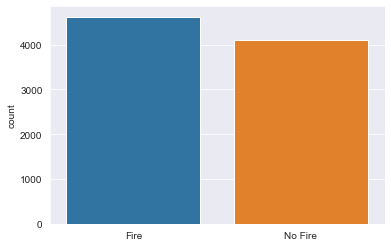

In [6]:
classification_check = []
for i in train:
    if(i[1]==0):
        classification_check.append('Fire')
    else:
        classification_check.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(classification_check)

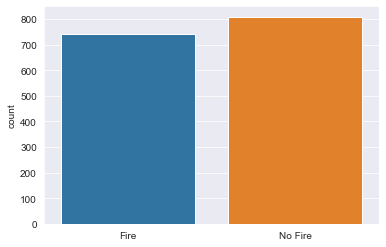

In [7]:
class_check_2 = []
for i in val:
    if(i[1]==0):
        class_check_2.append('Fire')
    else:
        class_check_2.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(class_check_2)

Text(0.5, 1.0, 'no_fire')

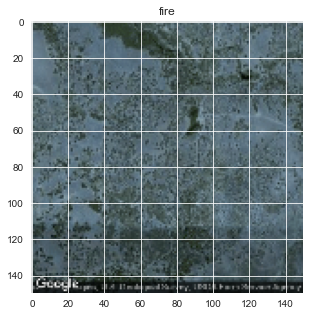

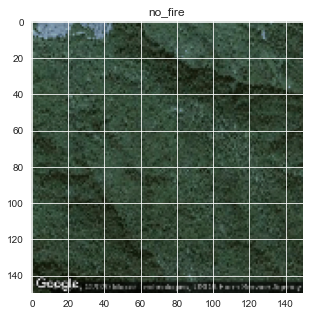

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [10]:
train.shape

(8736, 2)

In [11]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [12]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [13]:
print(train.shape)
print(x_train.shape)

(8736, 2)
(8736, 150, 150, 3)


In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3) , strides =1, padding ='same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D((2,2) , strides =2, padding ='same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0

In [15]:
x_train.shape

(8736, 150, 150, 3)

In [16]:
y_train.shape

(8736,)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0

In [18]:
history = model.fit(x_train, y_train, batch_size = 100, epochs= 12, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/12
88/88 [==============================] - 190s 2s/step - loss: 0.7190 - accuracy: 0.5567 - val_loss: 0.7050 - val_accuracy: 0.4836
Epoch 2/12
88/88 [==============================] - 181s 2s/step - loss: 0.6566 - accuracy: 0.6218 - val_loss: 0.6602 - val_accuracy: 0.6299
Epoch 3/12
88/88 [==============================] - 197s 2s/step - loss: 0.6269 - accuracy: 0.6590 - val_loss: 0.6665 - val_accuracy: 0.5519
Epoch 4/12
88/88 [==============================] - 192s 2s/step - loss: 0.6109 - accuracy: 0.6754 - val_loss: 0.6277 - val_accuracy: 0.6112
Epoch 5/12
88/88 [==============================] - 196s 2s/step - loss: 0.5916 - accuracy: 0.6929 - val_loss: 0.6817 - val_accuracy: 0.6132
Epoch 6/12
88/88 [==============================] - 186s 2s/step - loss: 0.5742 - accuracy: 0.7050 - val_loss: 0.6946 - val_accuracy: 0.5493
Epoch 7/12
88/88 [==============================] - 181s 2s/step - loss: 0.5639 - accuracy: 0.7107 - val_loss: 0.6453 - val_accuracy: 0.5887
Epoch 8/12
88

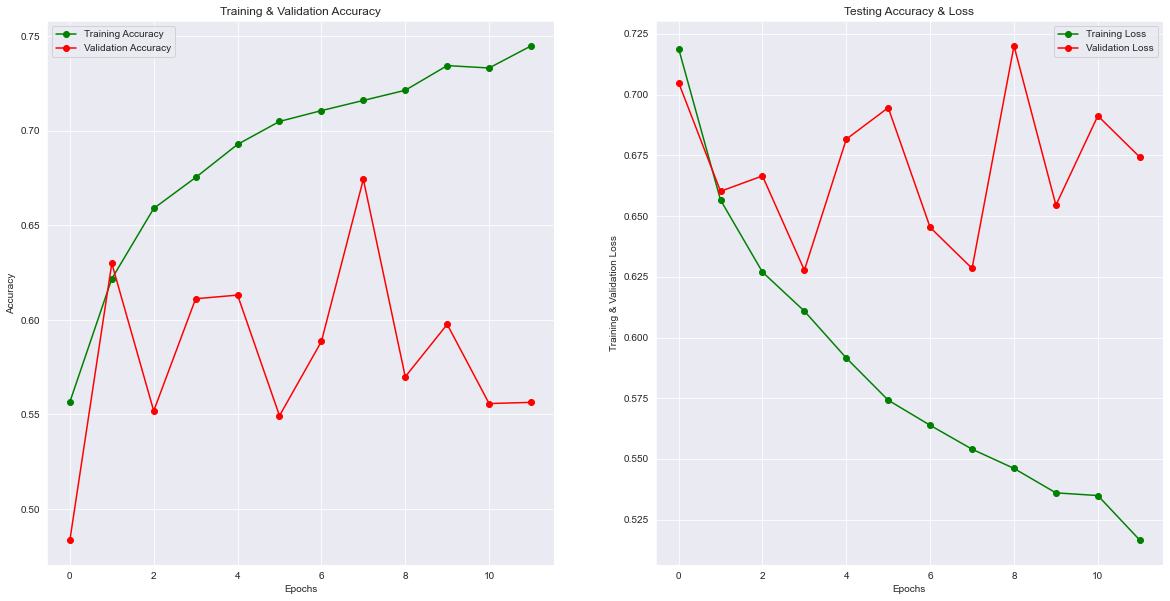

In [19]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [20]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.24      0.14      0.17      1008\n           1       0.41      0.58      0.48      1056\n\n    accuracy                           0.36      2064\n   macro avg       0.33      0.36      0.33      2064\nweighted avg       0.33      0.36      0.33      2064\n'

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.24      0.14      0.17      1008
           1       0.41      0.58      0.48      1056

    accuracy                           0.36      2064
   macro avg       0.33      0.36      0.33      2064
weighted avg       0.33      0.36      0.33      2064

